<a href="https://colab.research.google.com/github/Redcoder815/Deep_Learning_TensorFlow/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

class MyConv2D(tf.keras.layers.Layer):
    def __init__(self, filters, kernel_size, strides=1, padding="SAME"):
        super().__init__()
        self.filters = filters
        self.kernel_size = kernel_size
        self.strides = strides
        self.padding = padding

    def build(self, input_shape):
        in_channels = input_shape[-1]

        # Kernel: [kernel_h, kernel_w, in_channels, filters]
        self.kernel = self.add_weight(
            name="kernel",
            shape=(self.kernel_size, self.kernel_size, in_channels, self.filters),
            initializer="glorot_uniform",
            trainable=True
        )

        # Bias: [filters]
        self.bias = self.add_weight(
            name="bias",
            shape=(self.filters,),
            initializer="zeros",
            trainable=True
        )

    def call(self, x):
        x = tf.nn.conv2d(
            x,
            self.kernel,
            strides=[1, self.strides, self.strides, 1],
            padding=self.padding
        )
        x = tf.nn.bias_add(x, self.bias)
        return tf.nn.relu(x)


/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


In [ ]:
class MyDense(tf.keras.layers.Layer):
    def __init__(self, units):
        super().__init__()
        self.units = units

    def build(self, input_shape):
        in_features = input_shape[-1]

        self.W = self.add_weight(
            name="W",
            shape=(in_features, self.units),
            initializer="glorot_uniform",
            trainable=True
        )

        self.b = self.add_weight(
            name="b",
            shape=(self.units,),
            initializer="zeros",
            trainable=True
        )

    def call(self, x):
        return tf.nn.relu(tf.matmul(x, self.W) + self.b)

In [ ]:
class MyCNN(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.conv1 = MyConv2D(filters=32, kernel_size=3)
        self.conv2 = MyConv2D(filters=64, kernel_size=3)
        self.flatten = tf.keras.layers.Flatten()
        self.fc1 = MyDense(128)
        self.fc2 = tf.keras.layers.Dense(10)  # final logits

    def call(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        return self.fc2(x)

In [ ]:
# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train[..., None] / 255.0
x_test = x_test[..., None] / 255.0

model = MyCNN()

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

model.fit(x_train, y_train, epochs=3, batch_size=64)
# Evaluate on the full test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 120s 127ms/step - accuracy: 0.9280 - loss: 0.2393
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 119s 127ms/step - accuracy: 0.9891 - loss: 0.0341
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 119s 127ms/step - accuracy: 0.9935 - loss: 0.0196
313/313 - 4s - 12ms/step - accuracy: 0.9890 - loss: 0.0401
Test accuracy: 0.9890000224113464


In [ ]:
# Take first 10 test images
import numpy as np

logits = model(x_test[:10])
preds = tf.argmax(logits, axis=1)

print("Predicted labels:", preds.numpy())
print("True labels:     ", y_test[:10])

Predicted labels: [7 2 1 0 4 1 4 9 5 9]
True labels:      [7 2 1 0 4 1 4 9 5 9]


In [ ]:
# Pick one image
idx = 0
img = x_test[idx:idx+1]   # keep batch dimension

logits = model(img)
pred = tf.argmax(logits, axis=1).numpy()[0]

print("Prediction:", pred)
print("True label:", y_test[idx])

Prediction: 7
True label: 7


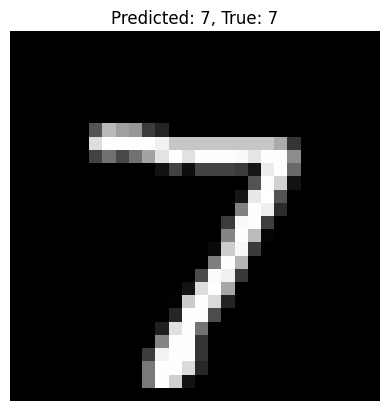

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_test[idx].squeeze(), cmap="gray")
plt.title(f"Predicted: {pred}, True: {y_test[idx]}")
plt.axis("off")
plt.show()

using sequential

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load MNIST digits (28x28 grayscale)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Add channel dimension and normalize
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

x_train = np.expand_dims(x_train, -1)  # (N, 28, 28, 1)
x_test  = np.expand_dims(x_test, -1)

num_classes = 10

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=3,
    batch_size=64,
    validation_split=0.1
)

Epoch 1/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.8638 - loss: 0.4473 - val_accuracy: 0.9838 - val_loss: 0.0521
Epoch 2/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.9846 - loss: 0.0502 - val_accuracy: 0.9867 - val_loss: 0.0446
Epoch 3/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.9880 - loss: 0.0389 - val_accuracy: 0.9885 - val_loss: 0.0410


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy:", test_acc)

Test accuracy: 0.9886999726295471


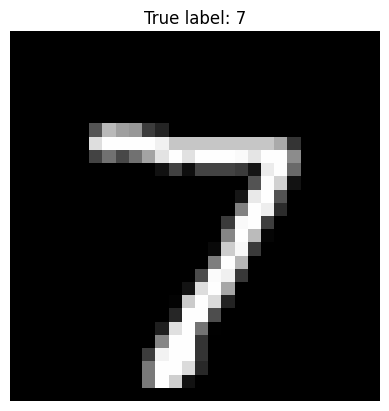

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted class: 7


In [ ]:
idx = 0  # choose any index
img = x_test[idx]          # shape (28, 28, 1)
label = y_test[idx]

plt.imshow(img.squeeze(), cmap="gray")
plt.title(f"True label: {label}")
plt.axis("off")
plt.show()

# Add batch dimension: (1, 28, 28, 1)
img_batch = np.expand_dims(img, axis=0)

pred = model.predict(img_batch)
pred_class = np.argmax(pred, axis=1)[0]

print("Predicted class:", pred_class)